In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Visualize the data generated from AI

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/hayyaoe/statistics_AFL2/main/dataset.csv?token=GHSAT0AAAAAACP3TA5GU6QPMZLDGJ6AZWMOZRAX2RQ', delimiter = ',')
df['engine_position'] = df['engine_position'].str.strip()
df['drivetrain'] = df['drivetrain'].str.strip()
df

,model,brand,drivetrain,engine_position,handling,acceleration,braking,horsepower,top_speed,weight,year_of_production
0,911 GT3 RS,Porsche,RWD,Rear,8.5,8.7,9.0,520,310,1350,2022.0
1,M3 BMW,RWD,Front,8.2,7.8,8.5,480.0,300,1600,2023,NaN
2,Aventador LP700-4,Lamborghini,AWD,Mid,9.0,8.5,9.0,690,350,1600,2021.0
3,Civic Type R,Honda,FWD,Front,8.0,7.0,7.5,320,270,1400,2022.0
4,F-150 Raptor,Ford,4WD,Front,7.5,8.0,7.5,450,250,2400,2023.0
...,...,...,...,...,...,...,...,...,...,...,...
107,XC90,Volvo,AWD,Front,6.8,7.0,6.8,316,230,2200,2022.0
108,Charger Hellcat,Dodge,RWD,Front,8.5,8.8,9.0,707,320,1900,2022.0
109,Cayenne Turbo,Porsche,AWD,Front,7.8,8.0,7.8,550,290,2200,2022.0
110,Q70,Infiniti,RWD,Front,6.5,7.0,6.5,330,250,1800,2022.0


In [3]:
# df['drivetrain'].unique()

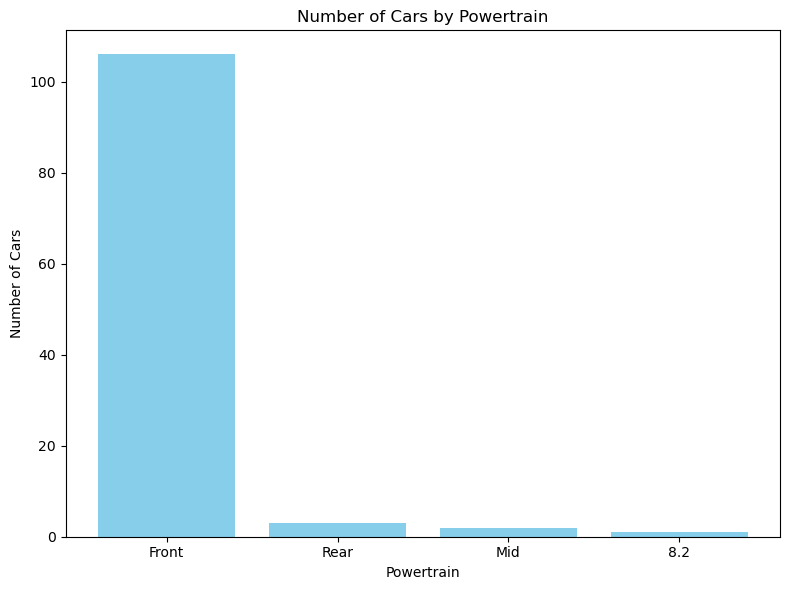

In [4]:
# Count the number of cars for each powertrain
powertrain_counts = df['engine_position'].value_counts()

# Plotting
plt.figure(figsize=(8, 6))
plt.bar(powertrain_counts.index, powertrain_counts.values, color='skyblue')
plt.xlabel('Powertrain')
plt.ylabel('Number of Cars')
plt.title('Number of Cars by Powertrain')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


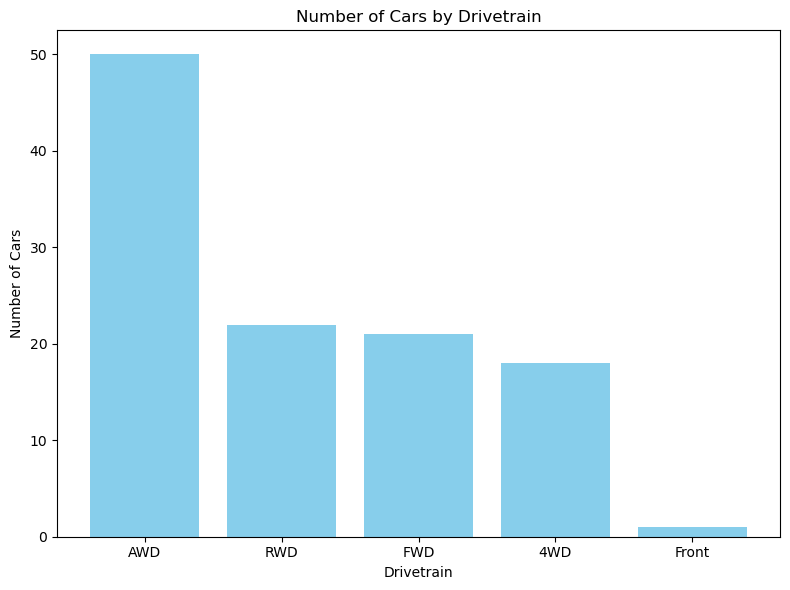

In [5]:
# Count the number of cars for each drivetrain
drivetrain_counts = df['drivetrain'].value_counts()

# Plotting
plt.figure(figsize=(8, 6))
plt.bar(drivetrain_counts.index, drivetrain_counts.values, color='skyblue')
plt.xlabel('Drivetrain')
plt.ylabel('Number of Cars')
plt.title('Number of Cars by Drivetrain')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()